## Parte 0: Il Dataset

Il dataset, scaricabile attraverso il link [https://bit.ly/46b8xYN](https://bit.ly/46b8xYN) e preso da Kaggle, contiene dati relativi alle prenotazioni di due hotel. Sono presenti diverse feature, tra cui:
* `hotel`: nome dell'hotel
* `is_canceled`: indica se la prenotazione è stata cancellata (1) o no (0)
* `lead_time`: giorni tra la prenotazione e l'arrivo
* `arrival_date_year` e `arrival_date_month`: anno e mese dell'arrivo
* `arrival_date_week_number`: settimana dell'anno dell'arrivo
* `arrival_date_day_of_month`: giorno del mese dell'arrivo
* `stays_in_weekend_nights`: numero di notti del weekend
* `stays_in_week_nights`: numero di notti infrasettimanali
* `adults`: numero di adulti
* `children`: numero di bambini
* `babies`: numero di neonati
* `meal`: tipo di pasto prenotato
* `country`: paese di provenienza
* `market_segment`: segmento di mercato
* `distribution_channel`: canale di distribuzione
* `is_repeated_guest`: se è un ospite ripetuto
* `previous_cancellations`: cancellazioni precedenti
* `previous_bookings_not_canceled`: prenotazioni precedenti non cancellate
* `reserved_room_type` e `assigned_room_type`: camera prenotata e assegnata
* `booking_changes`: modifiche alla prenotazione
* `deposit_type`: tipo di deposito
* `agent`: agente che ha effettuato la prenotazione
* `company`: compagnia
* `days_in_waiting_list`: giorni in lista d'attesa
* `customer_type`: tipo di cliente
* `adr`: tariffa media giornaliera
* `required_car_parking_spaces`: parcheggi auto richiesti
* `total_of_special_requests`: richieste speciali totali
* `reservation_status`: stato della prenotazione
* `reservation_status_date`: data dell'ultimo stato

In [1]:
import pandas as pd 

df = pd.read_csv('./dataset.csv', sep=',') ## ore 18:40
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


## Parte 1: Analisi (10 punti)

#### P1 Q1
**1. (Punti 1)**
Quante sono le istanze contenute nel dataset? Il dataset è completo (cioè per ogni istanza tutti i valori di ogni attributo sono sempre correttamente specificati - non esistono "missing values")? Il dataset è bilanciato per quanto riguarda la classe da predire?

In [33]:
n_instances = df.index.size
print(f'numero di istanze: {n_instances}')

nan_present = df.isna().any().any()
print(f'Il dataset non è completo: nan_present: {nan_present}')

balanced_s = df.groupby('is_canceled')['hotel'].count()
print(f'Il dataset non è bilanciato:\n{balanced_s}')

numero di istanze: 119390
Il dataset non è completo: nan_present: True
Il dataset non è bilanciato:
is_canceled
0    75166
1    44224
Name: hotel, dtype: int64


#### P1 Q2
**2. (Punti 2)**
Calcolare in una nuova colonna la durata totale del soggiorno come somma di `stays_in_weekend_nights` e `stays_in_week_nights` e verificare con un opportuno grafico se c'è una relazione tra la durata del soggiorno e la tariffa media giornaliera (`adr`): i soggiorni più lunghi hanno tariffe medie più basse?

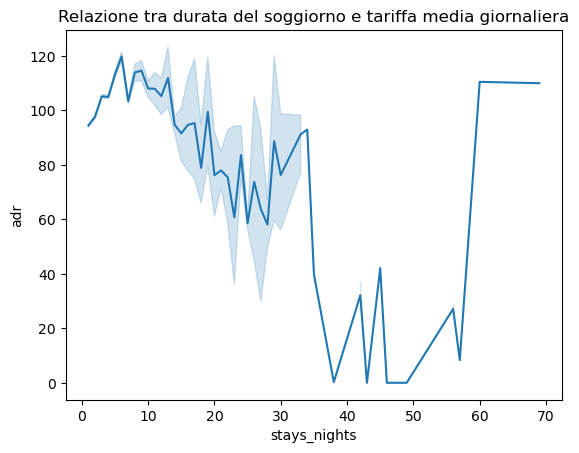

In [34]:
df['stays_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

import seaborn as sns
import matplotlib.pyplot as plt 

filter_condition = (df['adr'] < 1000) & (df['stays_nights'] > 0)
df_plot = df[filter_condition]

plt.title('Relazione tra durata del soggiorno e tariffa media giornaliera')
sns.lineplot(data=df_plot,
                x='stays_nights',
                y='adr')
plt.show()

#### P1 Q3
**3. (Punti 3)**
Considerare soltanto le prenotazioni in cui c'è almeno un neonato o almeno un bambino e discretizzare la variabile `lead_time` in 5 gruppi. Verificare attraverso una tabella pivot se è vero che le prenotazioni effettuate con maggior anticipo hanno in media meno probabilità di essere cancellate all'aumentare del numero totale di neonati e bambini presenti.

In [35]:
df3 = df.dropna(subset=['children', 'babies'])

df3['sum_children'] = df3['babies'] + df3['children']
df3 = df3[df3['sum_children'] > 0]
df3['lead_time'] = pd.cut(df3['lead_time'], bins=5, precision=0)

pd.pivot_table(data=df3, index='sum_children', columns='lead_time', values='is_canceled', aggfunc='mean')

lead_time,"(-0.0, 85.0]","(85.0, 170.0]","(170.0, 254.0]","(254.0, 339.0]","(339.0, 424.0]"
sum_children,,,,,
1.0,0.239530,0.369650,0.407767,0.548000,0.421053
2.0,0.354982,0.486643,0.453975,0.592357,0.857143
3.0,0.256757,0.318182,0.272727,0.250000,NaN
9.0,0.000000,NaN,NaN,NaN,NaN
10.0,0.500000,NaN,NaN,NaN,NaN


#### P1 Q4
**4. (Punti 4)**
Si vuole analizzare il tasso di cancellazione per mese: creare una tabella che mostra la percentuale di cancellazioni (`is_canceled`) per ogni mese di arrivo (`arrival_date_month`), sostituire i nomi dei mesi con i numeri da 1 a 12 e visualizzare attraverso un grafico a barre come varia il tasso di cancellazione durante l'anno.

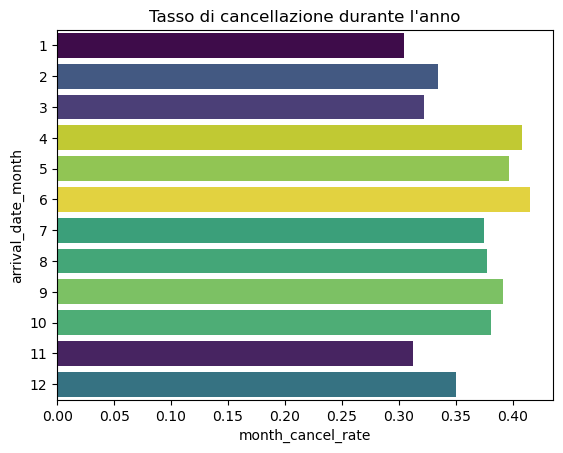

In [36]:
df_4 = df.copy()

month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

df_4['month_cancel_rate'] = df_4.groupby('arrival_date_month')['is_canceled'].transform('mean')
df_4['arrival_date_month'] = df_4['arrival_date_month'].map(month_map)

plt.title("Tasso di cancellazione durante l'anno")
sns.barplot(data=df_4, 
            y='arrival_date_month',
            x= 'month_cancel_rate',
            hue='month_cancel_rate',
            legend=False,
            palette='viridis', 
            orient='h'
            )
plt.show()

<Axes: xlabel='is_canceled', ylabel='arrival_date_month'>

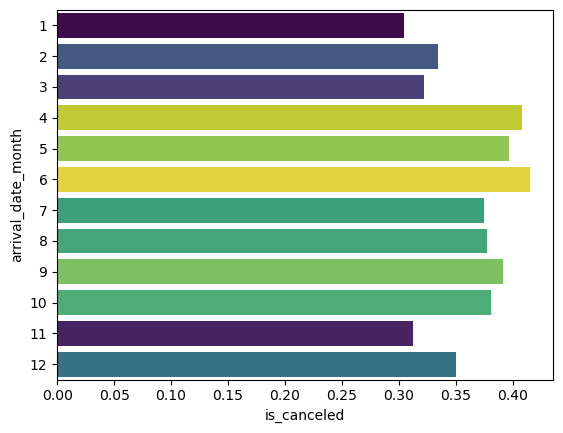

In [37]:
# 1. Creare la tabella riassuntiva (Aggregation)
# Questo crea un DF di sole 12 righe
summary_table = df.groupby('arrival_date_month')['is_canceled'].mean().reset_index()

# 2. Mappatura (identica alla tua)
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 
             'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
summary_table['arrival_date_month'] = summary_table['arrival_date_month'].map(month_map)

summary_table = summary_table.sort_values('arrival_date_month')

# 3. Plotting usando la tabella riassuntiva
sns.barplot(data=summary_table, 
            y='arrival_date_month', 
            x='is_canceled', # Qui usi direttamente la media calcolata
            hue='is_canceled',
            orient='h', 
            palette='viridis',
            legend=False)

## Parte 2: Trasformazione e Predizione (20 punti)

#### P2 Q1
**1. (Punti 4)**
Si vuole predire se una prenotazione verrà cancellata (`is_canceled`). Ricaricare il dataset originale, eliminare eventuali attributi inutili (giustificare la scelta), eliminare gli attributi con più del 50% di valori nulli, eliminare le istanze che contengono valori nulli, eliminare i duplicati, trasformare opportunamente valori categorici e dividere il dataset in modo che 3/4 degli elementi siano contenuti in un nuovo dataset "train" e 1/4 nel dataset "test" preservando le proporzioni delle classi nella colonna target. Confrontare la predizione ottenuta sia sul dataset train sia sul dataset test dai classificatori DecisionTree, KNeighborsClassifier e da un dummy classifier a scelta. Effettuare alcune considerazioni sui risultati ottenuti, tenendo in considerazione i valori di F1 e della confusion matrix.

In [38]:
data = df.copy()

# Elimino le colonne che non reputo rilevanti al fine di predire is_canceled. Inoltre reservation_status è una rappresentazione testuale di is_canceled, quindi va rimossa
cols_to_drop = ['country', 'agent', 'company', 'reservation_status_date', 'reservation_status']
data = data.drop(columns=cols_to_drop)

# Elimino le colonne che riportano piu del 50% di attributi nulli
data = data.dropna(axis=1, thresh=data.index.size/2)

# Elimino le istanze che contengono valori nulli
data = data.dropna(axis=0, how='any')

# Elimino i duplicati
data = data.drop_duplicates()


In [39]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 
                    'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']

data_transformed = pd.get_dummies(data=data, columns=categorical_cols)

X = data_transformed.drop(columns=['is_canceled'])
y = data_transformed['is_canceled']

dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)
knn = KNeighborsClassifier()
dum = DummyClassifier()

def print_stats(y_true, y_pred, label):
    print(label)
    f1 = f1_score(y_true, y_pred)
    print('f1: ', f1)
    print(confusion_matrix(y_true, y_pred))
    print('')

def fit_predict_score(model, X, y, label):
    print(label)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, stratify=y)
    model.fit(X_train, y_train)
    print_stats(y_train, model.predict(X_train), 'Train score')
    print_stats(y_test, model.predict(X_test), 'Test score')

fit_predict_score(dt, X, y, label='Decision Tree:')
fit_predict_score(knn, X, y, label='KNN')
fit_predict_score(dum, X, y, label='Dummy')

Decision Tree:
Train score
f1:  0.5806236895530336
[[42654  3542]
 [ 9059  8723]]

Test score
f1:  0.5637127425485097
[[14146  1253]
 [ 3109  2818]]

KNN
Train score
f1:  0.5766782121062181
[[42404  3792]
 [ 9041  8741]]

Test score
f1:  0.3772067477442134
[[13053  2346]
 [ 4004  1923]]

Dummy
Train score
f1:  0.0
[[46196     0]
 [17782     0]]

Test score
f1:  0.0
[[15399     0]
 [ 5927     0]]



In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

X_sampled = X.sample(1000, random_state=42)
y_sampled = y[X_sampled.index]

X_train, X_test, y_train, y_test = train_test_split(X_sampled, 
                                                    y_sampled, 
                                                    train_size=.75, 
                                                    stratify=y_sampled)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

r = permutation_importance(knn, X_test, y_test,
                           n_repeats=5,
                           random_state=42,
                           scoring='f1')

/home/alesvale/miniconda3/envs/bdta_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/alesvale/miniconda3/envs/bdta_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/alesvale/miniconda3/envs/bdta_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/alesvale/miniconda3/envs/bdta_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/alesvale/miniconda3/envs/bdta_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but KNeighborsC

/tmp/ipykernel_1484/407081186.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(r.importances[indices].T,


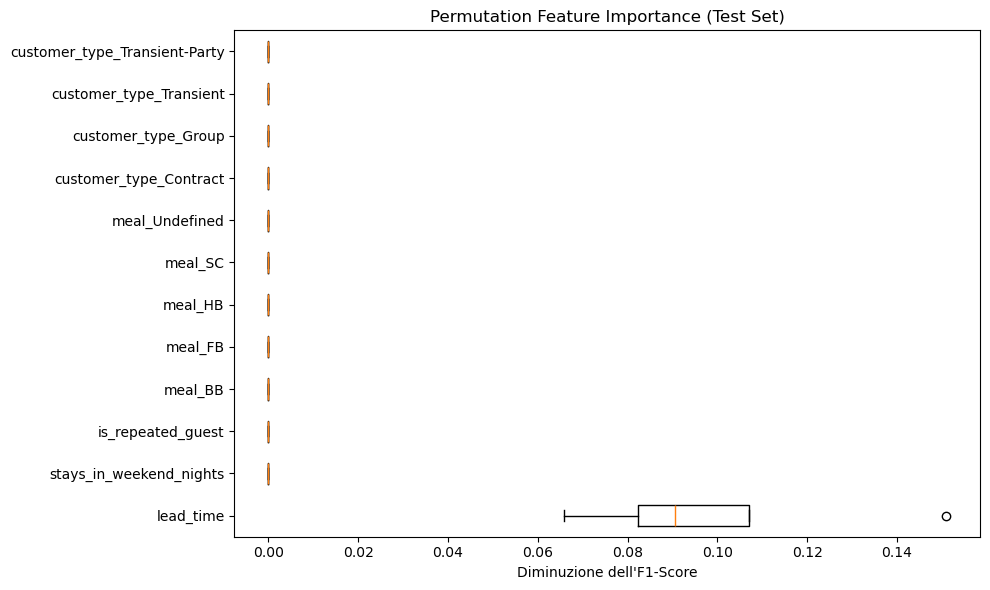

In [41]:
target_features = ['customer_type', 'stays_in_weekend_nights', 'meal', 'lead_time', 'is_repeated_guest']

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance_Mean': r.importances_mean,
    'Importance_Std': r.importances_std
})

mask = importance_df['Feature'].apply(lambda x: any(x.startswith(t) for t in target_features))
filtered_results = importance_df[mask]
sorted_results = filtered_results.sort_values(by='Importance_Mean', ascending=False)
indices = [X_test.columns.get_loc(c) for c in sorted_results['Feature']]

plt.figure(figsize=(10, 6))
plt.boxplot(r.importances[indices].T,
            vert=False,
            labels=sorted_results['Feature'])
plt.title("Permutation Feature Importance (Test Set)")
plt.xlabel("Diminuzione dell'F1-Score")
plt.tight_layout()
plt.show()

f1 score for Decision tree, train data: 0.5865029054410987
f1 score for Decision tree, test data: 0.5656081485919713
f1 score for KNeighbors, train data: 0.574750502289121
f1 score for KNeighbors, test data: 0.36895901558003374
f1 score for Dummy cls, train data: 0.0
f1 score for Dummy cls, test data: 0.0


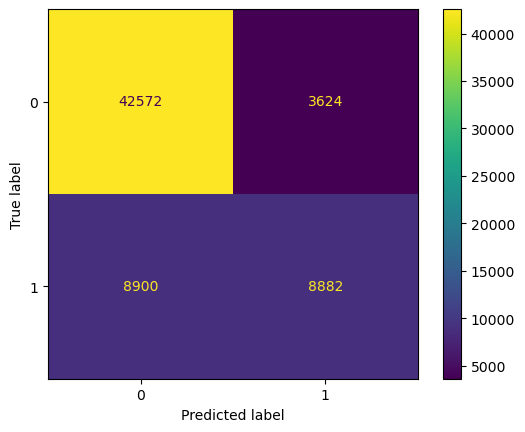

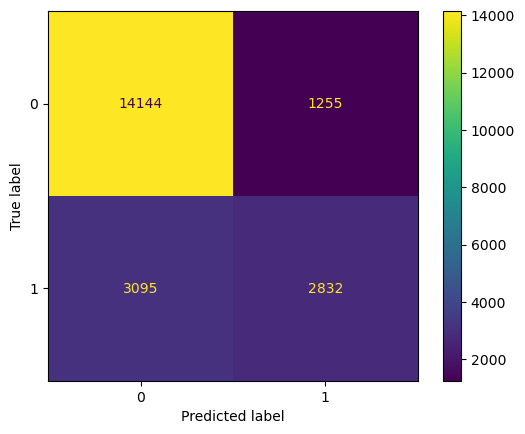

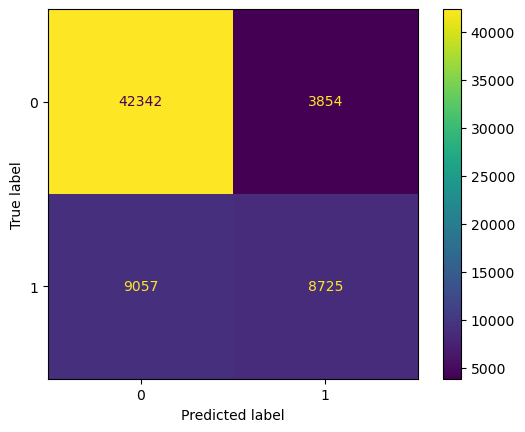

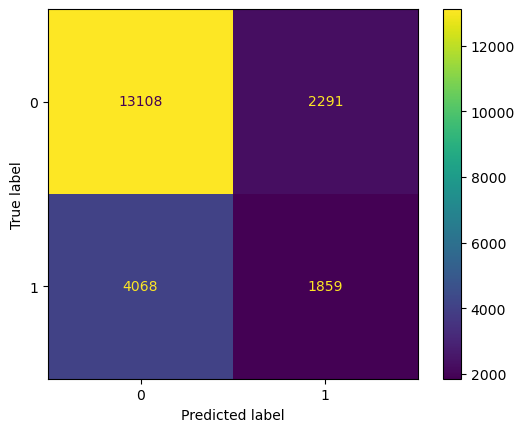

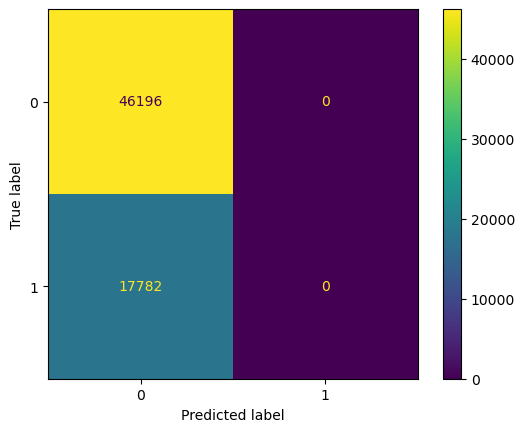

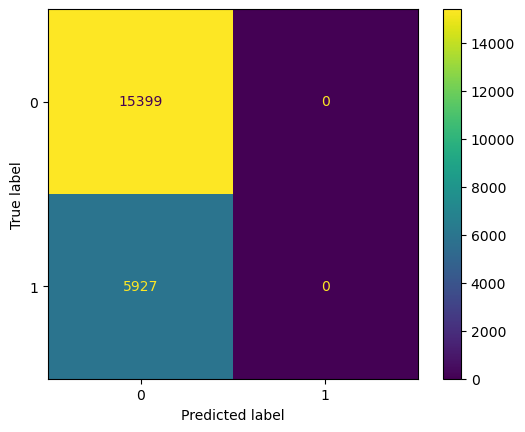

In [42]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

feature_cols = [ col for col in list(data.columns) if col != 'is_canceled' ]
target_col = ['is_canceled']

X = data.drop(columns=target_col)
y = data['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=42, stratify=y)

preprocessing = ColumnTransformer(transformers=[
    ('categorical', OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object))    
], remainder='passthrough')

pipeline_dt = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('model', DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)) # max_depth per cercare di risolvere overfitting
])

pipeline_kn = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('model', KNeighborsClassifier())
])

pipeline_dummy = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('model', DummyClassifier())
])

pipeline_dt.fit(X_train, y_train)
pipeline_kn.fit(X_train, y_train)
pipeline_dummy.fit(X_train, y_train)

def score_confusion_matrix(pipeline, X, y_true, label):
    y_pred = pipeline.predict(X)
    f1 = f1_score(y_true, y_pred)
    print(f'f1 score for {label}: {f1}')
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

score_confusion_matrix(pipeline_dt, X_train, y_train, label="Decision tree, train data")
score_confusion_matrix(pipeline_dt, X_test, y_test, label="Decision tree, test data")
score_confusion_matrix(pipeline_kn, X_train, y_train, label="KNeighbors, train data")
score_confusion_matrix(pipeline_kn, X_test, y_test, label="KNeighbors, test data")
score_confusion_matrix(pipeline_dummy, X_train, y_train, label="Dummy cls, train data")
score_confusion_matrix(pipeline_dummy, X_test, y_test, label="Dummy cls, test data")

#### P2 Q2
**2. (Punti 2)**
A partire dal dataset utilizzato al punto 1, trovare i valori migliori dei parametri `weights` e `n_neighbors` del classificatore KNeighborsClassifier. Come varia il valore di F1? (N.B. specifica lo scoring).

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__weights': ['uniform', 'distance'],
    'model__n_neighbors': [1, 3, 5, 10]
}

cv = GridSearchCV(pipeline_kn, param_grid=param_grid).fit(X_train, y_train)

best = cv.best_estimator_

In [44]:
y_pred = best.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'Best estimatore f1score: {f1}')

Best estimatore f1score: 0.2613608450012282


In [45]:
print(f"parametri migliori trovati: {cv.best_params_}")

parametri migliori trovati: {'model__n_neighbors': 10, 'model__weights': 'uniform'}


#### P2 Q3
**3. (Punti 4)**
Attraverso la tecnica Permutation Feature Importance (PFI) e considerando il classificatore KNeighborsClassifier, analizzare l'importanza delle seguenti feature: `customer_type`, `stays_in_weekend_nights`, `meal`, `lead_time`, `is_repeated_guest`. Applicare 5 permutazioni per ogni feature. Quali risultano essere le 2 feature più importanti?

In [46]:
from sklearn.inspection import permutation_importance

r = permutation_importance(knn, X_test, y_test,
                           n_repeats=5,
                           random_state=42,
                           scoring='f1')

/home/alesvale/miniconda3/envs/bdta_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 27 features, but KNeighborsClassifier is expecting 78 features as input.

/tmp/ipykernel_28759/3162331821.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(r.importances[indices].T,


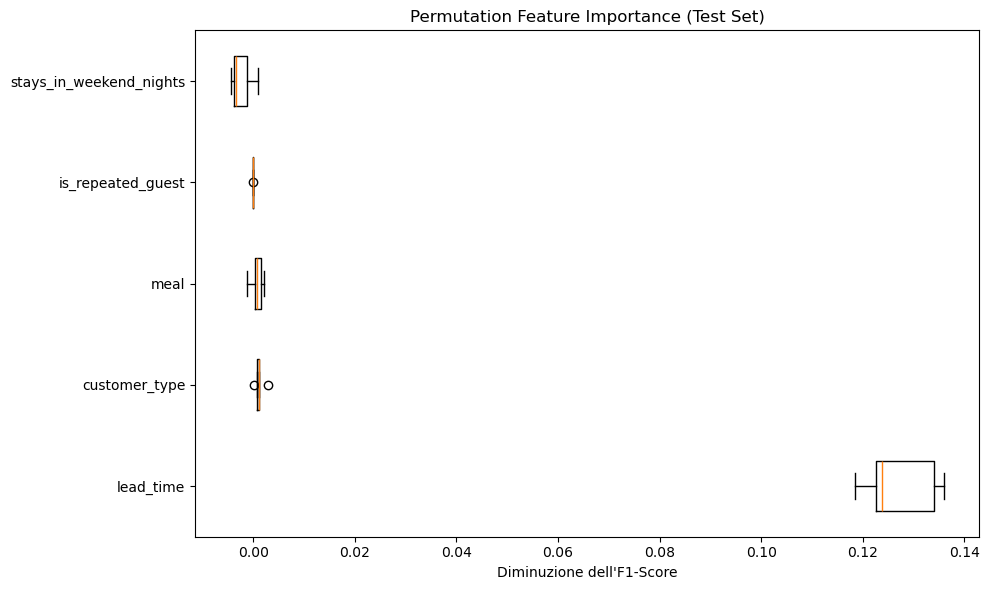

In [ ]:
target_features = ['customer_type', 'stays_in_weekend_nights', 'meal', 'lead_time', 'is_repeated_guest']

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance_Mean': r.importances_mean,
    'Importance_Std': r.importances_std
})

filtered_results = importance_df[importance_df['Feature'].isin(target_features)]
sorted_results = filtered_results.sort_values(by='Importance_Mean', ascending=False)
indices = [X_test.columns.get_loc(c) for c in sorted_results['Feature']]

plt.figure(figsize=(10, 6))
plt.boxplot(r.importances[indices].T,
            vert=False,
            labels=sorted_results['Feature'])
plt.title("Permutation Feature Importance (Test Set)")
plt.xlabel("Diminuzione dell'F1-Score")
plt.tight_layout()
plt.show()

#### P2 Q4
**4. (Punti 3)**
Creare una pipeline in cui, a partire dal dataset utilizzato al punto 1, i valori degli attributi `lead_time` e `adr` sono discretizzati in 5 intervalli, la variabile `total_of_special_requests` è scalata nell'intervallo 0-1 e tutti gli altri attributi sono lasciati invariati. Applicare il KNeighborsClassifier con i valori migliori dei parametri analizzati nel punto precedente e confrontare i risultati.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler

preprocessing = ColumnTransformer(transformers=[
    ('discretized', KBinsDiscretizer(n_bins=5), ['lead_time', 'adr']),
    ('scaled', StandardScaler(), ['total_of_special_requests']),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object))
], remainder='passthrough')

pipeline_4 = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('model', KNeighborsClassifier(n_neighbors=10, weights='distance'))
])

pipeline_4.fit(X_train, y_train)

y_pred = pipeline_4.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f"f1: {f1}")

/home/alesvale/miniconda3/envs/bdta_env/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


f1: 0.930534554834119


#### P2 Q5
**5. (Punti 4)**
Aggiungere alle componenti della pipeline del punto precedente le componenti ottenute dalla decomposizione TruncatedSVD. Valutare il valore migliore per il numero di componenti di TruncatedSVD tra 2, 4 e 6.

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import FeatureUnion, FunctionTransformer

combined_features = FeatureUnion([
    ('original', FunctionTransformer(lambda x: x, validate=False)), 
    ('svd', TruncatedSVD(n_components=2)) 
])

pipeline_5 = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('feature_expansion', combined_features),
    ('model', KNeighborsClassifier(n_neighbors=10, weights='distance'))
])

pipeline_5.fit(X_train, y_train)

/home/alesvale/miniconda3/envs/bdta_env/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('feature_expansion', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('discretized', ...), ('scaled', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If th

In [ ]:
params = {
    'feature_expansion__svd__n_components': [2, 4, 6]
}

cv5 = GridSearchCV(pipeline_5, param_grid=params).fit(X_train, y_train)

estimator = cv5.best_estimator_
y_pred = best.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f'Best estimator f1score: {f1}')

/home/alesvale/miniconda3/envs/bdta_env/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/home/alesvale/miniconda3/envs/bdta_env/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/home/alesvale/miniconda3/envs/bdta_env/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:304: Fut

Best estimator f1score: 0.4569955975518093


#### P2 Q6
**6. (Punti 3)**
Ricaricare il dataset, rimuovere gli attributi con più del 50% di valori nulli, eventuali attributi inutili e i duplicati, creare una pipeline che trasforma le colonne testuali in valori numerici, applica il SimpleImputer per sostituire i valori nulli, trasforma tutte le feature attraverso lo Standard Scaler e applica il KNeighborsClassifier.

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector

df6 = pd.read_csv('./dataset.csv')

df6 = df6.dropna(axis=1, thresh=df6.shape[0]/2) 

df6 = df6.drop_duplicates()

useless_cols = ['company', 'agent', 'country', 'reservation_status', 'reservation_status_date']
cols_to_drop = [c for c in useless_cols if c in df6.columns]
df6 = df6.drop(columns=cols_to_drop)

X = df6.drop(columns=['is_canceled'])
y = df6['is_canceled']

X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X, y, train_size=0.75, stratify=y, random_state=42)

transformer = ColumnTransformer(transformers=[
    ('textual', OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object)) 
], remainder='passthrough')

pipeline6 = Pipeline(steps=[
    ('preprocessing', transformer),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler(with_mean=False)), # with_mean False se ho una matrice sparsa, come in questo caso perchè ho OneHotEncoder
    ('model', KNeighborsClassifier())
])

pipeline6.fit(X_train_6, y_train_6)
y_pred = pipeline6.predict(X_test_6)

f1 = f1_score(y_test_6, y_pred)
print(f'Best estimator f1score: {f1}')

Best estimator f1score: 0.5575812274368231
